In [1]:
import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.plot.coord import coord_polar


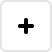
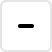
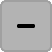
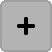
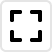
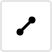
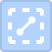
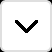
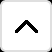
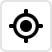
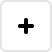
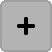
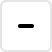
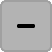
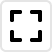
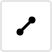
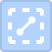
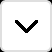
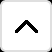
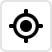

In [2]:
LetsPlot.setup_html()

#### Set `theme_gray()` as default theme. It improves plots readability.

In [3]:
LetsPlot.set_theme(theme_grey())

#### Data

In [4]:
labels_df = {
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'y': [0, 45, 90, 135, 180, 225, 270, 315, 360],
    'r_y': [360, 315, 270, 225, 180, 135, 90, 45, 0],
    'l': ['l0', 'l45', 'l90', 'l135', 'l180', 'l225', 'l270', 'l315', 'l360'],
    'g': ['g1', 'g1', 'g1', 'g2', 'g2', 'g2', 'g3', 'g3', 'g3']
}

lollipop_df = {
    'x': [1, 2, 3, 4, 5, 6],
    'y': [1, 2, 3, 4, 5, 6],
}

##### Util for `PlotSpecDebugger.kt`

In [5]:
def dump_plot(plot, display=False):
    import json

    try:
        import clipboard
    except:
        clipboard = None
        
    from lets_plot._type_utils import standardize_dict
    
    plot_dict = standardize_dict(plot.as_dict())
    plot_json = json.dumps(plot_dict, indent=2)
    
    if clipboard:
        clipboard.copy('')
        clipboard.copy(str(plot_json))
    else:
        if display is None:
            display = True

    return plot

# Geoms

## `geom_segment()`

In [6]:
p = ggplot() \
    + geom_segment(x=0, y=0, xend=4, yend=4, arrow=arrow(), size=1) \
    + geom_segment(x=8, y=0, xend=4, yend=4, arrow=arrow(), size=1) \

gggrid([
    p,
    p + coord_polar(xlim=[0,8])
])

`size_end`/`stroke_end` precision length adjustment parameters:

In [7]:
# known problem - zero-length segment because of second datapoint.
# this is a temp workaround to sync stroke/stroke_end and size/size_ens domains
d= { 
    'x': [0,1], 
    'y':[0,0], 
    'size': [8,10], 
    'stroke':[1,2],
    'size_end':[10,0], 
    'stroke_end':[2,0]
}

p = ggplot(d, aes('x','y')) \
    + geom_point(aes(size='size', stroke='stroke'), shape=21, alpha=0.5, color="red", show_legend=False) \
    + geom_segment(
        aes(size_start='size', stroke_start='stroke',size_end='size_end', stroke_end='stroke_end'),
        xend=1, 
        yend=0,
        size=2,
        arrow=arrow(ends='both', type='open', length=22, angle=30), 
    ) \
    + scale_identity(['size','size_start','size_end']) 

gggrid([
    p,
    p + coord_polar(xlim=[-0.35, 1.35], ylim=[-2, 2])
])

## `geom_label()`
Regular scatter plot.

In [8]:
p = ggplot(labels_df, aes(x='x', y='y', label='l')) + geom_label()

gggrid([
    p, 
    p + coord_polar() + ggtitle('coord_polar()'),
    p + coord_polar(theta='y') + ggtitle('theta=y'),
])

## `geom_path()`
The transform resamples path data by converting straight segments into curves. The `flat` parameter controls this behaviour.

In [9]:
p = ggplot(labels_df, aes(x='x', y='y', color='y')) + scale_color_brewer(palette='GnBu')

gggrid([
    p + geom_path(size=3) + coord_polar() + ggtitle('coord_polar()'),
    p + geom_path(size=3, flat=True) + coord_polar(theta="x") + ggtitle('coord_polar(), flat=True'),
], ncol=2)

## `geom_lollipop()`
See the `Params` section for details on using the `xlim` parameter.

In [10]:
p = ggplot(lollipop_df, aes('x', 'y')) + geom_lollipop()

gggrid([
    p, 
    p + coord_polar(xlim=[1, 7]),
])

## `geom_rect()`

### Stacked bars
are transformed into a pie chart

In [11]:
p = ggplot() \
    + geom_rect(xmin=0, xmax=5, ymin=0, ymax=7, fill='red', size=0) \
    + geom_rect(xmin=0, xmax=5, ymin=7, ymax=11, fill='blue', size=0) \
    + geom_rect(xmin=0, xmax=5, ymin=11, ymax=14, fill='green', size=0) 

gggrid([
    p,
    p + coord_polar() + ggtitle('coord_polar()'),
    p + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
]).show()

gggrid([
    p + coord_polar(theta='y', direction=-1) + ggtitle('coord_polar(theta=y, dir=-1)'),
    p + coord_polar(theta='y', direction=-1, start=3.14/2) + ggtitle('coord_polar(theta=y, dir=-1, start=PI/2)'),
]).show()



### Dodged bars

In [12]:
p = ggplot() \
    + geom_rect(xmin=0, xmax=1, ymin=0, ymax=7, fill='red', size=0) \
    + geom_rect(xmin=1, xmax=2, ymin=0, ymax=4, fill='blue', size=0) \
    + geom_rect(xmin=2, xmax=3, ymin=0, ymax=3, fill='green', size=0) \

gggrid([
    p, 
    p + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
    p + coord_polar(theta='x') + ggtitle('coord_polar(theta=x)'),
])

### Horizontal bars

In [13]:
p = ggplot() \
    + geom_rect(ymin=0, ymax=1, xmin=0, xmax=7, fill='red', size=0) \
    + geom_rect(ymin=1, ymax=2, xmin=0, xmax=4, fill='blue', size=0) \
    + geom_rect(ymin=2, ymax=3, xmin=0, xmax=3, fill='green', size=0) \

gggrid([
    p, 
    p + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
    p + coord_polar(theta='x') + ggtitle('coord_polar(theta=x)'),
])

## `geom_bar()` 
This works similarly to rects, but with the addition of tooltips.

### `position='stack'`

In [14]:
from lets_plot.mapping import as_discrete
bar_df = { 'foo': [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3] }
p = ggplot(bar_df) + geom_bar(aes(fill=as_discrete('foo', order=1)), size=0)

gggrid([
    p,
    p + coord_polar(theta='y') + ggtitle('position=stack, coord_polar(theta=y)'),
    p + coord_polar(theta='x') + ggtitle('position=stack, coord_polar(theta=x)'),
])

### `position='dodge'`

In [15]:
p = ggplot(bar_df) + geom_bar(aes(fill=as_discrete('foo', order=1)), size=0, position='dodge')

gggrid([
    p,
    p + coord_polar(theta='y') + ggtitle('position=dodge, coord_polar(theta=y)'),
    dump_plot(p + coord_polar(theta='x') + ggtitle('position=dodge, coord_polar(theta=x)')),
])

### Demo: wind rose
See: https://mesonet.cdn.columbiascanner.org/onsite/windrose/IA_ASOS/PEA/PEA_yearly.png  
Data: https://mesonet.cdn.columbiascanner.org/sites/windrose.phtml?station=PEA&network=IA_ASOS

In [16]:
wind_df = pd.read_csv('coord_polar_wind.csv')

def is_float(x):
    try:
        float(x)
    except ValueError:
        return False
    return True


wind_df = wind_df[wind_df.sped.apply(lambda x: is_float(x))]
wind_df = wind_df[wind_df.drct.apply(lambda x: is_float(x))]

wind_df['sped'] = wind_df['sped'].astype(float)
wind_df['drct'] = wind_df['drct'].astype(float)

wind_df = wind_df[wind_df.sped.apply(lambda x: x >= 2.0)]

wind_df.head()

,station,valid,drct,sped
0,PEA,2002-05-17 00:14,330.0,8.05
1,PEA,2002-05-17 00:20,330.0,8.05
2,PEA,2002-05-17 00:34,340.0,10.35
3,PEA,2002-05-17 00:40,340.0,10.35
4,PEA,2002-05-17 00:54,340.0,14.95


In [17]:
# Define the speed bins
bins = [2, 5, 7, 10, 15, 20, float('inf')]
bin_ids = list(range(6))

wind_df['speed_bin'] = pd.cut(wind_df['sped'], bins=bins, labels=bin_ids, right=False)

In [18]:
from lets_plot.mapping import as_discrete
ggplot(wind_df) \
    + geom_bar(aes('drct', fill=as_discrete('speed_bin', order=1)), size=0, width=0.8) \
    + scale_fill_manual(
        name='Wind Speed:', 
        breaks={'2 - 4.9': 0, '5 - 6.9': 1, '7 - 9.9': 2, '10 - 14.9': 3, '15 - 19.9': 4, '20+': 5},
        values=['#002bff', '#03d3f8', '#7afe81', '#fde609', '#ff4404', '#780200'], 
    ) \
    + scale_x_continuous(
        breaks={'N': 360, 'NE': 45, 'E': 90, 'SE': 135, 'S': 180, 'SW': 225, 'W': 270, 'NW': 315}
    ) \
    + ggsize(800, 800) \
    + coord_polar(ylim=[-9000, 50_000], start=(3.14 * 2) / 36 / 2) \
    + theme_minimal2() \
    + theme(
        panel_grid_ontop=True, 
        axis_ontop=True, 
        panel_grid=element_line(color='#A0A0A0')
    )

## `geom_hline()`/`geom_vline()`

In [19]:
p = ggplot() \
    + geom_hline(yintercept=5, color='red') \
    + geom_hline(yintercept=10, color='green') \
    + geom_hline(yintercept=15, color='blue') \
    + geom_hline(yintercept=20, color='orange') \
    + geom_vline(xintercept=10, color='pink') \
    + geom_vline(xintercept=20, color='magenta') \
    + geom_vline(xintercept=30, color='dark_green') \
    + xlim(0, 30)\
    + ylim(0, 20)
gggrid([p, dump_plot(p + coord_polar())])

## `geom_tile()`

In [20]:
x = list(range(24))
d1 = list(np.interp(x, [0, 8, 14, 18, 23], [3, 12, 18, 8, 2]))
d2 = list(np.interp(x, [0, 8, 14, 18, 23], [2, 7, 11, 5, 0]))
d3 = list(np.interp(x, [0, 8, 14, 18, 23], [0, 11, 15, 13, 8]))
d4 = list(np.interp(x, [0, 8, 14, 18, 23], [8, 7, 11, 5, 2]))
d5 = list(np.interp(x, [0, 8, 14, 18, 23], [2, 12, 20, 15, 12]))
d6 = list(np.interp(x, [0, 8, 14, 18, 23], [12, 14, 22, 19, 15]))
d7 = list(np.interp(x, [0, 8, 14, 18, 23], [15, 13, 26, 22, 11]))
temp = d1 + d2 + d3 + d4 + d5 + d6 + d7
day = ([1] * 24) + ([2] * 24) + ([3] * 24) + ([4] * 24) + ([5] * 24) + ([6] * 24) + ([7] * 24)

df = pd.DataFrame({
    "time": [i for i in range(24)] * 7,
    "day": day,
    "temp": temp
})

p = ggplot(df) \
    + geom_tile(aes(x='time', y='day', fill='temp'), tooltips=layer_tooltips().format('^x', '{.1d}:00')) \
    + scale_fill_viridis() \
    + scale_x_continuous(format='{.1d}:00') \
    + scale_y_discrete(breaks={ 'Mon': 1, 'Tue': 2, 'Wen': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7 }, expand=[0, 10])

gggrid([
    p,
    p + coord_polar(ylim=[-2,7], start=(-3.14 * 2) / 24 / 2) # ylim=-2 to make the hole, start to align ticks vertically
]) + ggsize(1200, 600)

# Params

In [21]:
p = ggplot(labels_df, aes(x='x', y='y', color='y')) + geom_path(size=3, show_legend=False) + scale_color_brewer(palette='GnBu')


p + coord_polar() + ggtitle('Default plot with coord_polar()')

### `direction`

In [22]:
p + coord_polar(direction=-1) + ggtitle('coord_polar(direction=-1)')

### `start`

In [23]:
gggrid([
    p + coord_polar(start=3.14 / 2) + ggtitle('start=PI/2'),
    p + coord_polar(start=-3.14 / 2) + ggtitle('start=-PI/2'),
])

### `direction` + `start`

In [24]:
gggrid([
    p + coord_polar(start=3.14 / 2, direction=-1) + ggtitle('dir=-1, start=PI/2'),
    p + coord_polar(start=-3.14 / 2, direction=-1) + ggtitle('dir=-1, start=-PI/2'),
])

### `xlim`
Allows to fix overlapping between first and last value, e.g. for `geom_lollipop` or `radar`.

In [25]:
p = ggplot(lollipop_df, aes('x', 'y')) + geom_lollipop()

gggrid([
    p + coord_polar(),
    p + coord_polar(xlim=[1, 7])
])

### `ylim`
Move data from the center. Usefull for radar plot.

In [26]:
data = {
    'subj': ['progr', 'math', 'physic', 'chemistry', 'biology'],
    'subj_id': [1, 2, 3, 4, 5],
    'student': ['John'] * 5,
    'score': [19, 15, 18, 12, 9]
}

p = ggplot(data) \
    + geom_path(aes(x='subj', y='score', color='student'), flat=True) \
    + geom_point(aes(x='subj', y='score', color='student'))

gggrid([
    p + coord_polar(),
    p + coord_polar(ylim=[0, 20])
])                

# Scales

In [27]:
pie = ggplot() \
    + geom_rect(xmin=0, xmax=1, ymin=0, ymax=7, fill='red', size=0) \
    + geom_rect(xmin=1, xmax=2, ymin=0, ymax=4, fill='blue', size=0) \
    + geom_rect(xmin=2, xmax=3, ymin=0, ymax=3, fill='green', size=0) \
    + coord_polar()

sticks_df = {
    'x': [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    'y': [0, 1, 0, 2, 0, 3, 0, 4, 0, 5, 0, 6],
    'g': [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
}

sticks = ggplot(sticks_df) + geom_path(aes(x='x', y='y', group='g', color='g'), size=3) + coord_polar() + scale_color_discrete(scale_mapper_kind='color_hue')

## Expand
By default `coord_polar()` resets expands to zero, yet expands still can be set explicitly.  
Horizontal non-zero expand will produce a gap between sectors, so the plot will never turn into a circle.  
Vertical non-zero expand will produce a central hole (expand for the domains lower end) and a buffer between plot and axis (expand for the domains upper end).  

`expand` is symmetrical so it can't be used to ajust only lower or only upper end.

In [28]:
gggrid([
    pie + ggtitle('No expand'), 
    pie \
        + scale_x_continuous(expand=[0.10, 0]) \
        + scale_y_continuous(expand=[0.10, 0]) \
        + ggtitle('scale_XY_continuous(expand=...)'),
]).show()


gggrid([
    sticks + ggtitle('No expand'),
    sticks \
        + scale_x_continuous(expand=[0, 0.5]) \
        + scale_y_continuous(expand=[0, 2]) \
        + ggtitle('scale_XY_continuous(expand=...)'),
])

## Limit
`limits` parameter can be used to ajust lower and upper limits individually, but requires absolute values.

In [29]:
gggrid([
    pie, 
    pie \
        + scale_x_continuous(limits=[0, 3.5]) \
        + scale_y_continuous(limits=[-2, 8]),
]).show()

gggrid([
    sticks + ggtitle('No limits'),
    sticks + lims(x=[0, 6], y=[-2, 6]) + ggtitle('Limits with lims(...)'),
    sticks \
        + scale_y_continuous(limits=[-2, 6]) \
        + scale_x_continuous(limits=[0, 6]) \
        + ggtitle('Limits with scale__continuous(...)')
])

## Discrete x-scale  
The discrete x-scale is adjusted so that the first and last values don't overlap.

In [30]:
sticks + scale_x_discrete()

## `scale_y_log10()`  
Log-scale works fine.

In [31]:
d = {
    'x': [1, 2, 3, 4, 5, 6, 7, 8],
    'y': [1, 10, 100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000],
}

p = ggplot(d) + geom_path(aes(x='x', y='y'), flat=True)
p

gggrid([
    dump_plot(p),
    p + coord_polar(),
    p + scale_y_log10(),
    p + scale_y_log10(format='.1~e') + coord_polar(),
], ncol=2)

# Theme

In [32]:
p = ggplot(labels_df, aes(x='x', y='y', color='y')) + scale_color_brewer(palette='GnBu') + geom_path(size=3, show_legend=False)
polar_p = p + coord_polar()

## Themes list:

In [33]:
gggrid([
    p,
    polar_p + theme_minimal2() + ggtitle('theme_minimal2()'),
    polar_p + theme_bw() + ggtitle('theme_bw()'),
    polar_p + theme_classic() + ggtitle('theme_classic()'),
    polar_p + theme_grey() + ggtitle('theme_grey()'),
    polar_p + theme_light() + ggtitle('theme_light()'),
    polar_p + theme_minimal() + ggtitle('theme_minimal()'),
    polar_p + theme_none() + ggtitle('theme_none()'),
    polar_p + theme_void() + ggtitle('theme_void()'),
], ncol=3)

## Theme configuration:

In [34]:
p_tmp = p + theme(
    axis_line_y=element_line(color='red', size=2),
    axis_line_x=element_line(color='blue', size=2),
    axis_ticks_length_y=5,
    axis_ticks_length_x=10,
    axis_ticks_y=element_line(size=5, color='red'), 
    axis_ticks_x=element_line(size=3, color='blue'),
    axis_text_x=element_text(color='blue'),
    axis_text_y=element_text(color='red'),
)

dump_plot(gggrid([
    p_tmp,
    p_tmp + coord_polar()
]))

# Issues

In [35]:
data = {
    'x': ['txt 1', 'txt 2', 'txt 3', 'txt 4'],
    'y': [1, 2, 3, 4],
}
ggplot(data, aes('x', 'y')) + geom_point() + coord_polar()

##### 1. Ticks overlapping

# Regressions

Make sure that axis and grid alignment is still working in all cases:
- coord_flip
- title
- top/bottom/left/right
- marginal
- facet

In [36]:
p = ggplot(labels_df, aes(x='x', y='y', color='y')) + geom_path(size=3) + scale_color_brewer(palette='GnBu') + theme_light()
default = p + ggtitle('Default')
both = p + scale_x_continuous(position='both') + scale_y_continuous(position='both') + ggtitle('Both')
flip = p + coord_flip() + ggtitle('coord_flip()')
flip_both = p + scale_x_continuous(position='both') + scale_y_continuous(position='both') + coord_flip() + ggtitle('both + coord_flip()')
facet = p + facet_grid(x='g') + ggtitle('Facet')
facet_both = both + facet_grid(x='g') + ggtitle('Facet Both')
facet_flip = flip + facet_grid(x='g') + ggtitle('Facet Flip')
facet_flip_both = flip_both + facet_grid(x='g') + ggtitle('Facet Flip Both')

g = gggrid([
    default,
    both,
    flip,
    flip_both,
    facet, 
    facet_both,
    facet_flip,
    facet_flip_both
], ncol=1)

g

Single plot review:

In [37]:
p = ggplot(labels_df, aes(x='x', y='y', label='l')) + geom_label()

p_rect_stack = ggplot() \
    + geom_rect(xmin=0, xmax=5, ymin=0, ymax=7, fill='red', size=0) \
    + geom_rect(xmin=0, xmax=5, ymin=7, ymax=11, fill='blue', size=0) \
    + geom_rect(xmin=0, xmax=5, ymin=11, ymax=14, fill='green', size=0) \


p_rect_dodge = ggplot() \
    + geom_rect(xmin=0, xmax=1, ymin=0, ymax=7, fill='red', size=0) \
    + geom_rect(xmin=1, xmax=2, ymin=0, ymax=4, fill='blue', size=0) \
    + geom_rect(xmin=2, xmax=3, ymin=0, ymax=3, fill='green', size=0) \

gggrid([
    p_rect_dodge, 
    p_rect_dodge + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
    p_rect_dodge + coord_polar(theta='x') + ggtitle('coord_polar(theta=x)'),
])

from lets_plot.mapping import as_discrete
bar_df = { 'foo': [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3] }
p_bar_stack = ggplot(bar_df) + geom_bar(aes(fill=as_discrete('foo', order=1)), size=0)
p_bar_dodge = ggplot(bar_df) + geom_bar(aes(fill=as_discrete('foo', order=1)), size=0, position='dodge')

# lollipop
p_lollipop = ggplot(lollipop_df, aes('x', 'y')) + geom_lollipop() + coord_polar(xlim=[1, 7])

# radar
data = {
    'subj': ['a', 'b', 'c', 'd', 'e'],
    'subj_id': [1, 2, 3, 4, 5],
    'student': ['John'] * 5,
    'score': [19, 15, 18, 12, 9]
}

p_radar = ggplot(data) \
    + geom_path(aes(x='subj', y='score', color='student'), flat=True) \
    + geom_point(aes(x='subj', y='score', color='student'))\
    + coord_polar(ylim=[0, 20])

gggrid([
    p + coord_polar() + ggtitle('coord_polar()'),
    p + coord_polar(theta='y') + ggtitle('theta=y'),
    None,
    p_rect_stack + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
    p_rect_stack + coord_polar(theta='y', direction=-1) + ggtitle('coord_polar(theta=y, dir=-1)'),
    p_rect_stack + coord_polar(theta='x') + ggtitle('coord_polar(theta=x)'),
    p_rect_dodge, 
    p_rect_dodge + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
    p_rect_dodge + coord_polar(theta='x') + ggtitle('coord_polar(theta=x)'),
    p_bar_stack,
    p_bar_stack + coord_polar(theta='y') + ggtitle('position=stack, coord_polar(theta=y)'),
    p_bar_stack + coord_polar(theta='x') + ggtitle('position=stack, coord_polar(theta=x)'),
    p_bar_dodge,
    p_bar_dodge + coord_polar(theta='y') + ggtitle('position=dodge, coord_polar(theta=y)'),
    p_bar_dodge + coord_polar(theta='x') + ggtitle('position=dodge, coord_polar(theta=x)'),
    p_lollipop,
    p_radar
], ncol=3)

# Sandbox

In [38]:
mpg = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')
mpg

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [39]:
mpg2 = mpg.copy()
mpg2['name'] = mpg2.apply(lambda x: f"{x['model']}-{x['displ']}-{x['year']}-{x['trans']}-{x['drv']}", axis=1)
mpg2

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,name
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,a4-1.8-1999-auto(l5)-f
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,a4-1.8-1999-manual(m5)-f
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,a4-2.0-2008-manual(m6)-f
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,a4-2.0-2008-auto(av)-f
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,a4-2.8-1999-auto(l5)-f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,passat-2.0-2008-auto(s6)-f
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,passat-2.0-2008-manual(m6)-f
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,passat-2.8-1999-auto(l5)-f
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,passat-2.8-1999-manual(m5)-f


In [40]:
ggplot(mpg) + geom_bar(aes(x='model', y='cty', fill='cty'), stat='identity', position='dodge') + scale_fill_gradient(low='red', high='white', limits=(5,40)) #+ theme_void()

In [41]:
_ + coord_polar()

In [42]:
p = ggplot(labels_df, aes(x='x', y='y', label='l')) + geom_point(alpha=0.3, color='red') + geom_text()
gggrid([
    p + coord_polar(theta='x'),
    p + coord_polar(theta='y'),
])

# `ggplot2` ticks comparison:

In [43]:
from IPython.display import SVG, Image, HTML

In [44]:
p = ggplot() \
    + geom_rect(xmin=-5, xmax=0, ymin=0, ymax=5, fill='red', size=0) \
    + geom_rect(xmin=-5, xmax=0, ymin=5, ymax=7.5, fill='green', size=0) \
    + theme_grey()
p

Actual:


Expected (ggplot2)


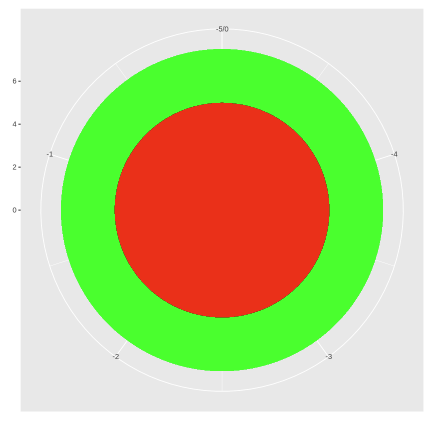

In [45]:
print("Actual:")
(p + coord_polar(theta = "x")).show()

print("Expected (ggplot2)")
display(Image("lets-plot-images/coord_polar_ggplot_theta_x.png"))

Actual


Expected (ggplot2):


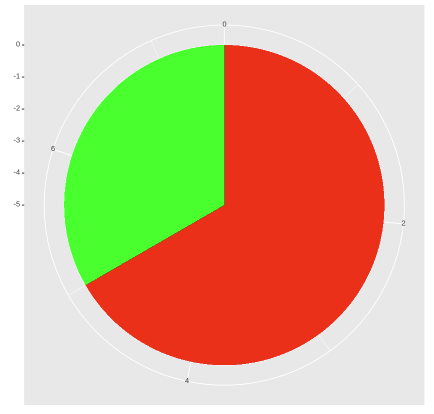

In [46]:
print("Actual")
(p + coord_polar(theta = "y")).show()
print("Expected (ggplot2):")
display(Image("lets-plot-images/coord_polar_ggplot_theta_y.png"))

In [47]:
p = ggplot() \
    + geom_rect(xmin=0, xmax=1, ymin=0, ymax=7, fill='red', size=0) \
    + geom_rect(xmin=1, xmax=2, ymin=0, ymax=4, fill='blue', size=0) \
    + geom_rect(xmin=2, xmax=3, ymin=0, ymax=3, fill='green', size=0) \

gggrid([
    p, 
    p + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
    dump_plot(p + scale_x_continuous(expand=[0.00, 0]) + coord_polar() + ggtitle('coord_polar(theta=x)')),
])